In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)

In [8]:
#Importing our CSV with pandas

df = pd.read_csv("/Users/jacksonhamilton/Documents/Data Analysis.nosync/Python/Data Sets/CFB2018completeISLR.csv")

In [ ]:
df.head()

In [11]:
#This serves as a list of all the original columns and their data type.

df.dtypes

Team                object
Year                 int64
Sagarin            float64
Zsagarin           float64
FrNbrRecruits        int64
Fr5star              int64
Fr4star              int64
Fr3star              int64
Fravg              float64
Frpoints            object
Sonbrrecruits        int64
So5star              int64
So4star              int64
So3star              int64
Soavg              float64
Sopoints            object
Jrnbrrecruits        int64
Jr5star              int64
Jr4star              int64
Jr3star              int64
Jravg              float64
Jrpoints            object
Srnbrrecruits        int64
Sr5star              int64
Sr4star              int64
Sr3star              int64
Sravg              float64
Srpoints            object
Rssrnbrrecruits      int64
Rssr5star            int64
Rssr4star            int64
Rssr3star            int64
Rssravg            float64
Rssrpoints          object
conference          object
lysagarin          float64
z_lysagarin        float64
t

In [12]:
# This provides us with the total number of rows and columns

df.shape

(857, 46)

In [13]:
# We are making sure that there are no duplicated rows in our data.

duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows:', duplicate_rows_df.shape)

number of duplicate rows: (0, 46)


In [14]:
# This is an attempt to find any null values.

print(df.isnull().sum())

Team               0
Year               0
Sagarin            0
Zsagarin           0
FrNbrRecruits      0
Fr5star            0
Fr4star            0
Fr3star            0
Fravg              0
Frpoints           0
Sonbrrecruits      0
So5star            0
So4star            0
So3star            0
Soavg              0
Sopoints           0
Jrnbrrecruits      0
Jr5star            0
Jr4star            0
Jr3star            0
Jravg              0
Jrpoints           0
Srnbrrecruits      0
Sr5star            0
Sr4star            0
Sr3star            0
Sravg              0
Srpoints           0
Rssrnbrrecruits    0
Rssr5star          0
Rssr4star          0
Rssr3star          0
Rssravg            0
Rssrpoints         0
conference         0
lysagarin          0
z_lysagarin        0
tyasagarin         0
z_tyasagarin       0
retoff             0
retdef             0
qbret              0
bowl               0
bowlwin            0
coachexp_school    0
coachexp_total     0
dtype: int64


,Year,Sagarin,Zsagarin,FrNbrRecruits,Fr5star,Fr4star,Fr3star,Fravg,Sonbrrecruits,So5star,...,z_lysagarin,tyasagarin,z_tyasagarin,retoff,retdef,qbret,bowl,bowlwin,coachexp_school,coachexp_total
Year,1.000000e+00,-0.053553,-3.785877e-12,-0.024409,-0.022258,-0.047323,0.066535,-0.007833,-6.537639e-02,-0.030590,...,-2.373469e-11,-0.082193,-1.878741e-11,-0.173224,-0.126374,-6.767328e-02,0.011477,0.011059,-0.050141,-0.064809
Sagarin,-5.355275e-02,1.000000,9.914474e-01,-0.011522,0.406247,0.502726,-0.059782,0.572135,1.855605e-02,0.392292,...,6.587651e-01,0.491057,4.824448e-01,0.127694,0.070877,8.623749e-02,0.439732,0.316022,0.226556,0.167282
Zsagarin,-3.785877e-12,0.991447,1.000000e+00,-0.011544,0.408473,0.500383,-0.063362,0.568085,1.646805e-02,0.393511,...,6.629544e-01,0.481164,4.811833e-01,0.108058,0.069075,8.448200e-02,0.445940,0.316596,0.226589,0.165444
FrNbrRecruits,-2.440934e-02,-0.011522,-1.154375e-02,1.000000,0.052805,0.162088,0.294443,-0.061010,2.172236e-01,-0.018936,...,2.266563e-02,-0.025711,-2.980690e-02,-0.135687,-0.151737,-1.315007e-02,0.023214,0.052333,-0.004820,0.016443
Fr5star,-2.225803e-02,0.406247,4.084734e-01,0.052805,1.000000,0.550092,-0.360204,0.636453,2.459084e-02,0.516228,...,4.017243e-01,0.392491,3.888496e-01,0.011130,-0.004440,-5.196541e-03,0.183991,0.188156,0.033137,0.037546
Fr4star,-4.732312e-02,0.502726,5.003834e-01,0.162088,0.550092,1.000000,-0.288080,0.865882,3.118833e-02,0.564780,...,5.336857e-01,0.524995,5.218075e-01,-0.022314,-0.046967,2.564799e-03,0.285081,0.206438,0.086945,0.108844
Fr3star,6.653523e-02,-0.059782,-6.336226e-02,0.294443,-0.360204,-0.288080,1.000000,-0.074812,-4.896153e-02,-0.320709,...,-5.627002e-02,-0.100236,-1.046604e-01,-0.019492,-0.082663,-3.352223e-03,0.004376,-0.017767,-0.018520,-0.007522
Fravg,-7.832854e-03,0.572135,5.680849e-01,-0.061010,0.636453,0.865882,-0.074812,1.000000,-7.814942e-03,0.553415,...,5.959592e-01,0.591929,5.868465e-01,0.025624,-0.011755,-8.110216e-04,0.328154,0.232345,0.091205,0.089283
Sonbrrecruits,-6.537639e-02,0.018556,1.646805e-02,0.217224,0.024591,0.031188,-0.048962,-0.007815,1.000000e+00,0.079859,...,4.721476e-03,0.032502,2.087762e-02,-0.008951,0.016665,-6.521938e-07,-0.021134,0.074043,0.001122,0.015440
So5star,-3.058961e-02,0.392292,3.935113e-01,-0.018936,0.516228,0.564780,-0.320709,0.553415,7.985873e-02,1.000000,...,4.155060e-01,0.400658,3.965624e-01,-0.037703,-0.039350,-3.145577e-02,0.179395,0.152430,0.061391,0.067638


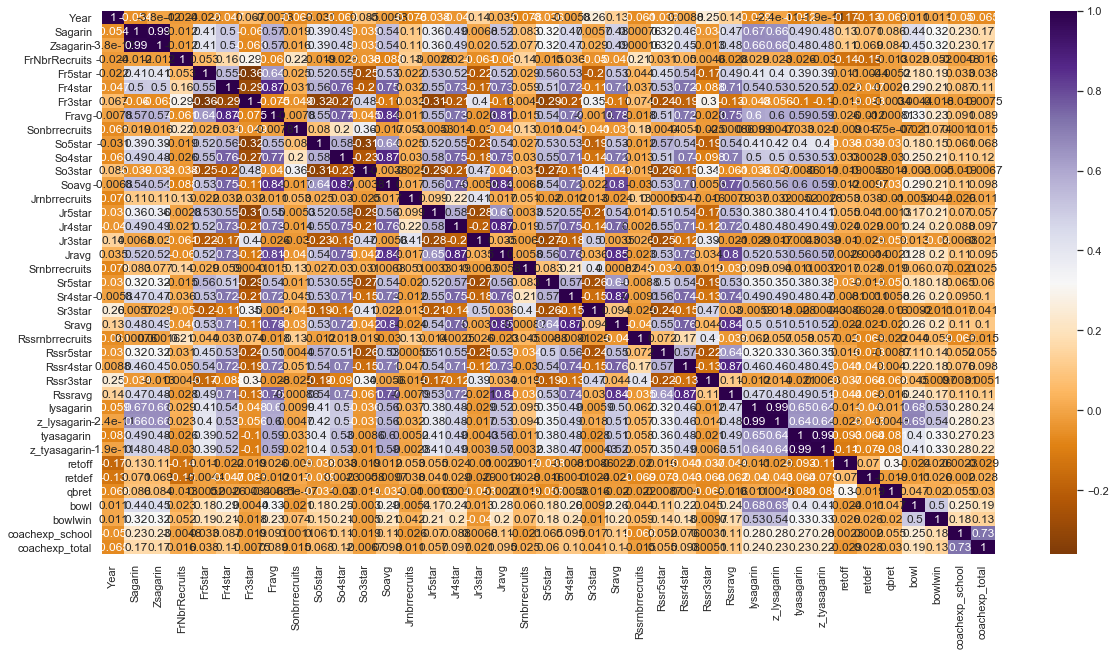

In [15]:
# This is a table giving us the correlations between variables

plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap='PuOr',annot=True)
c

In [17]:
# Dropping columns that seem useless

df = df.drop(['FrNbrRecruits','Zsagarin','Sonbrrecruits','Jrnbrrecruits','Srnbrrecruits','Rssrnbrrecruits','Rssr5star','Rssr4star','Rssr3star','z_lysagarin','z_tyasagarin','retoff','retdef','qbret','coachexp_school','coachexp_total'], axis=1)

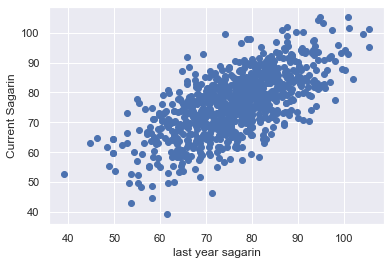

In [56]:
plt.scatter(x=df['lysagarin'], y=df['Sagarin'])
plt.xlabel('last year sagarin')
plt.ylabel('Current Sagarin')
plt.show()

#There seems to be apparent linear relationship. It is surprising to see the amount of schools that had an arguably high sagarin score the year before only for it to tumble.

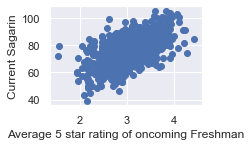

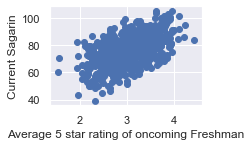

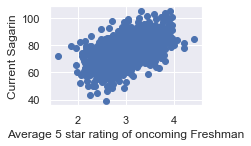

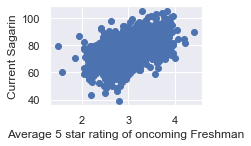

In [64]:
#COME BACK AND FIX THIS
plt.subplot(2, 2, 1)
plt.scatter(x=df['Fravg'], y=df['Sagarin'])
plt.xlabel('Average 5 star rating of oncoming Freshman')
plt.ylabel('Current Sagarin')
plt.show()

plt.subplot(2, 2, 2)
plt.scatter(x=df['Soavg'], y=df['Sagarin'])
plt.xlabel('Average 5 star rating of oncoming Sophomore')
plt.ylabel('Current Sagarin')
plt.show()

plt.subplot(2, 2, 3)
plt.scatter(x=df['Jravg'], y=df['Sagarin'])
plt.xlabel('Average 5 star rating of oncoming Junior')
plt.ylabel('Current Sagarin')
plt.show()

plt.subplot(2, 2, 4)
plt.scatter(x=df['Sravg'], y=df['Sagarin'])
plt.xlabel('Average 5 star rating of oncoming Senior')
plt.ylabel('Current Sagarin')
plt.show()
# Another linear relationship with what looks like there could be some potential for outliers. This can be determined later on.

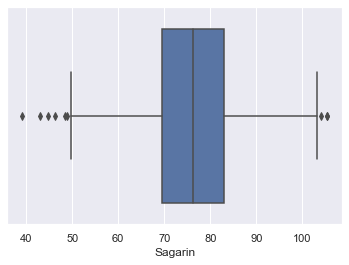

In [18]:
# Boxplot of Sagarin scores

sns.boxplot(x=df['Sagarin'])

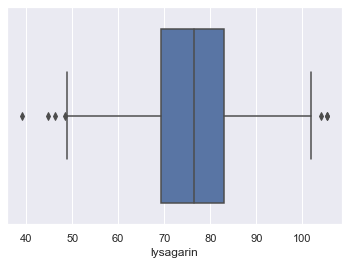

In [19]:
# Boxplot of the previous year's Sagarin score Sagarin scores


sns.boxplot(x = df['lysagarin'])

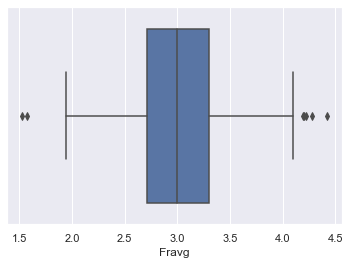

In [20]:
# Boxplot of average freshman 5-star ranking

sns.boxplot(x = df['Fravg'])

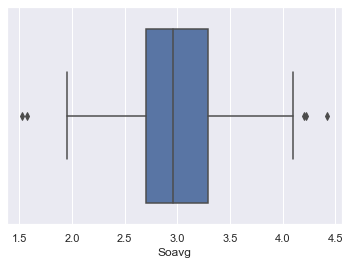

In [21]:
# Boxplot of average sophomore 5-star ranking

sns.boxplot(x = df['Soavg'])

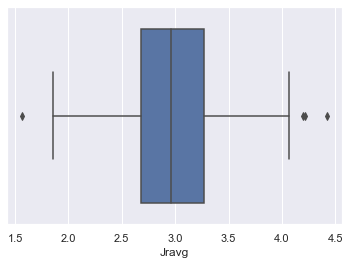

In [22]:
# Boxplot of average junior 5-star ranking

sns.boxplot(x = df['Jravg'])

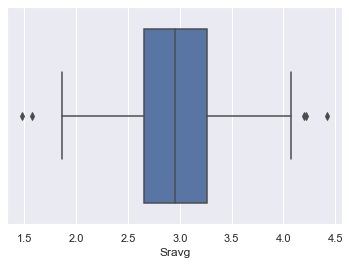

In [23]:
# Boxplot of average senior 5-star ranking

sns.boxplot(x = df['Sravg'])

In [68]:
model1 = df[['Team','Sagarin','lysagarin','Fravg','Soavg','Jravg','Sravg']]

In [69]:
model1.describe()

,Sagarin,lysagarin,Fravg,Soavg,Jravg,Sravg
count,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000
mean,76.084889,76.152415,3.010338,2.990677,2.978926,2.956126
std,10.371298,10.313161,0.441525,0.444794,0.443041,0.450100
min,39.160000,39.160000,1.530000,1.530000,1.570000,1.480000
25%,69.490000,69.220000,2.710000,2.700000,2.680000,2.650000
50%,76.350000,76.400000,3.000000,2.960000,2.960000,2.950000
75%,83.040000,83.040000,3.300000,3.290000,3.270000,3.260000
max,105.350000,105.350000,4.420000,4.420000,4.420000,4.420000


In [70]:
# Found and printed the IWR for each quantitative variable in mdoel1

Q1 = model1.quantile(0.25)
Q3 = model1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sagarin      13.55
lysagarin    13.82
Fravg         0.59
Soavg         0.59
Jravg         0.59
Sravg         0.61
dtype: float64


In [72]:
# Effectively reduced outliers throughout all of model1 and gave the name model1_out

model1_out = model1[~((model1 < (Q1 - 1.5 * IQR)) |(model1 > (Q3 + 1.5 * IQR))).any(axis=1)]
model1_out.shape

(825, 7)

In [73]:
X1 = model1_out[['lysagarin','Fravg','Soavg','Jravg','Sravg']]
y1 = model1_out['Sagarin'].values

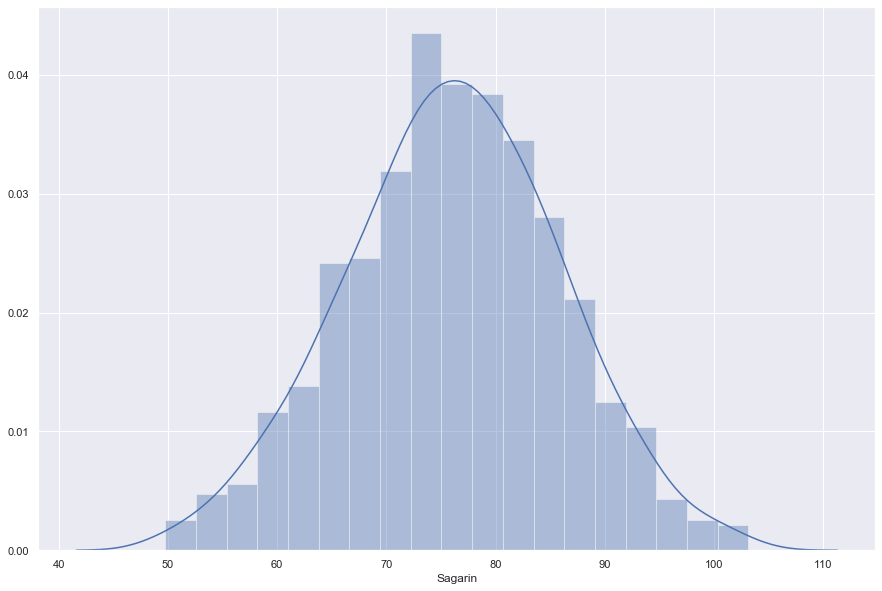

In [74]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(model1_out['Sagarin'])

In [82]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [83]:
regressor = LinearRegression()  
regressor.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
lysagarin,0.477340
Fravg,4.971148
Soavg,0.200547
Jravg,2.897903
Sravg,-0.418780


In [85]:
y1_pred = regressor.predict(X1_test)


In [86]:
model1df = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
model1df1 = model1df.head(25)
model1df1

,Actual,Predicted
0,76.14,72.950540
1,68.18,78.583175
2,82.81,69.727702
3,79.72,62.118324
4,72.69,68.281534
5,72.06,70.748139
6,73.56,67.806868
7,73.97,76.626757
8,76.68,77.537763
9,76.45,77.909961


In [80]:
# WORK NEEDED HERE
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 5.92110065248007
Mean Squared Error: 54.26080832843379
Root Mean Squared Error: 7.366193611929691
